In [17]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
data=pd.read_csv('meta.csv')
#data=data["Sunspots"]
scaler=MinMaxScaler(feature_range=(0,1))
column=['X']
data=scaler.fit_transform(data[column]).flatten()
data

array([0.24083641, 0.11685117, 0.19464945, 0.21894219, 0.27306273,
       0.20537485, 0.20510455, 0.19803198, 0.24354244, 0.18634686,
       0.18511685, 0.17712177, 0.17388654, 0.1906762 , 0.15129151,
       0.14452645, 0.11632879, 0.05289053, 0.0621217 , 0.08241082,
       0.06396064, 0.07060271, 0.08917589, 0.08302583, 0.10639606,
       0.10947109, 0.06365314, 0.08118081, 0.11162362, 0.09225092,
       0.11254613, 0.09409594, 0.09471095, 0.09717097, 0.11193719,
       0.12638376, 0.12731235, 0.13161132, 0.11562116, 0.08794588,
       0.09225092, 0.12546125, 0.13109501, 0.13653137, 0.12915129,
       0.12460025, 0.11685117, 0.08610086, 0.08117474, 0.07810578,
       0.06642066, 0.07227537, 0.07287823, 0.04956342, 0.04766298,
       0.05412054, 0.06928082, 0.02983995, 0.02730627, 0.0498155 ,
       0.09594096, 0.09255843, 0.10701107, 0.12484625, 0.11623616,
       0.11131004, 0.12238015, 0.10824108, 0.09163592, 0.10209102,
       0.11055381, 0.107005  , 0.08843788, 0.10362854, 0.11377

In [19]:
n=len(data)
split=int(n*0.9)
train_data=data[range(split)]
test_data=data[split:]


In [20]:
len(train_data)

355

In [21]:
hidden_units=50
time_steps=2
input_shape=(time_steps,1)
y_ind=np.arange(time_steps,len(train_data),time_steps)
y_train=train_data[y_ind]
x_train=train_data[range(len(y_train)*time_steps)]
x_train=np.reshape(x_train,(len(y_train),time_steps,1))

y_ind=np.arange(time_steps,len(test_data),time_steps)
y_test=test_data[y_ind]
x_test=train_data[range(len(y_test)*time_steps)]
x_test=np.reshape(x_test,(len(y_test),time_steps,1))


In [22]:
print(x_train.shape)
print(y_train.shape)

(177, 2, 1)
(177,)


In [23]:
model=Sequential()

model.add(LSTM(hidden_units,return_sequences=True,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(LSTM(hidden_units,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(hidden_units,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(hidden_units))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 7s 6ms/step - loss: 0.1033
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0818
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0571
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0372
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0290
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0273
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0231
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0126
Epoch 11/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 12/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 13/100
6/6 [==============================] - 0s 6ms/st

In [25]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

1/1 [==============================] - 0s 18ms/step


In [26]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

In [27]:
print_error(y_train,y_test,train_pred,test_pred)

Train RMSE: 0.033 RMSE
Test RMSE: 0.456 RMSE


In [28]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(20, 5), dpi=100)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

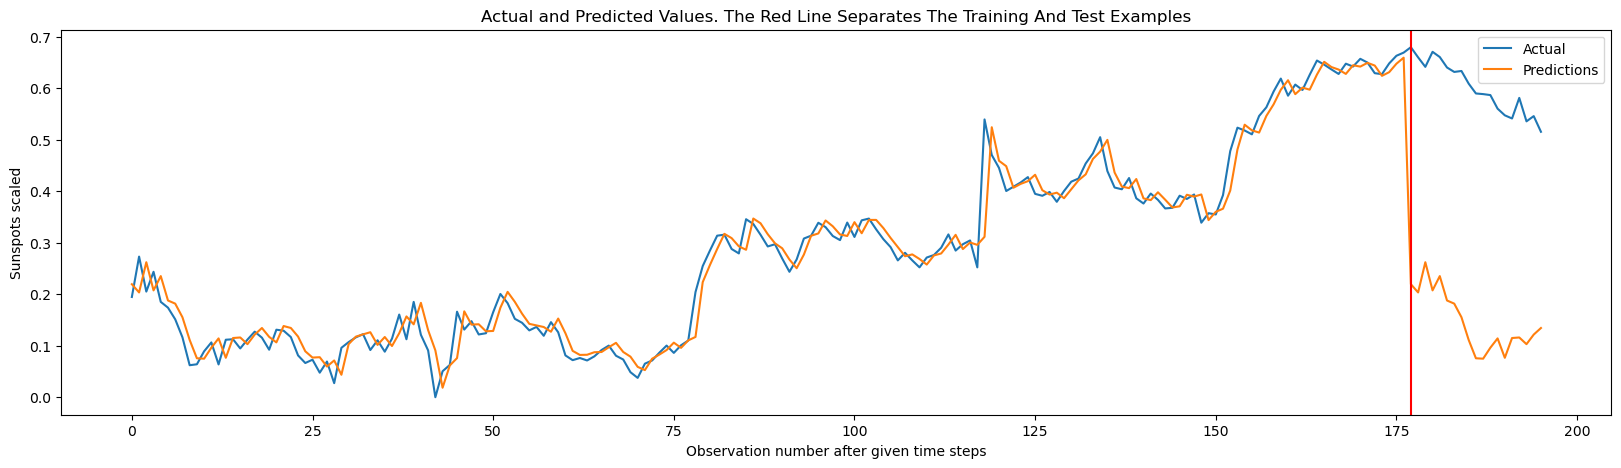

In [29]:
plot_result(y_train,y_test,train_pred,test_pred)

In [30]:
graph=pd.read_csv('graph.csv')
fig=px.line(graph,x=graph['X'],y=graph['Y'],title='Graph')
fig.show()